In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_excel("DataViz_Exercises - Data_FiNAL.xlsx")
df[df.isna().any(axis=1)]

,Platform,Men,Women
9,NaN,NaN,NaN
10,https://ourworldindata.org/rise-of-social-media,NaN,NaN


In [21]:
df.shape

(11, 3)

In [22]:
dfLine = pd.read_excel("DataViz_Exercises - Data_FiNAL.xlsx",sheet_name="Number 2")
dfLine = dfLine[~dfLine.isna().any(axis=1)]
dfLine

,Year,Mobile (hours per adult user),Desktop/Laptop (hours per adult user),Household using Social Media (%)
0,2008,0.3,2.2,21.0
1,2009,0.3,2.3,37.0
2,2010,0.4,2.4,48.0
3,2011,0.8,2.6,50.0
4,2012,1.6,2.5,59.0
5,2013,2.3,2.3,63.0
6,2014,2.6,2.2,62.0
7,2015,2.8,2.2,65.0
8,2016,3.1,2.2,69.0
9,2017,3.3,2.1,80.0


In [23]:
dfLine.columns

Index(['Year', 'Mobile (hours per adult user)',
       'Desktop/Laptop (hours per adult user)',
       'Household using Social Media (%)'],
      dtype='object')

In [27]:
dfLine["mobile/social"] = dfLine["Mobile (hours per adult user)"]/dfLine['Household using Social Media (%)']
dfLine["desktop/social"] = dfLine['Desktop/Laptop (hours per adult user)']/dfLine['Household using Social Media (%)']

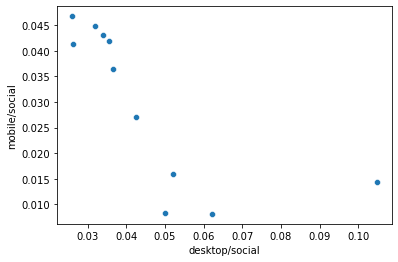

In [33]:
ax = sns.scatterplot(data=dfLine,x="desktop/social",y="mobile/social")

In [39]:
dfBar = pd.read_excel("DataViz_Exercises - Data_FiNAL.xlsx",sheet_name="Number 4")
dfBar.isna().sum()

                  1
Female (Ph)       2
Male (Ph)         2
Female (World)    2
Male (World)      2
dtype: int64

In [42]:
dfBar = dfBar[~dfBar.isna().any(axis=1)]
dfBar

,,Female (Ph),Male (Ph),Female (World),Male (World)
0,13-17,6.0,5.0,3.0,4.0
1,18-24,17.0,16.0,11.0,16.0
2,25-34,15.0,15.0,13.0,19.0
3,35-44,7.0,6.0,7.0,9.0
4,45-54,4.0,3.0,5.0,5.0
5,55-64,2.0,2.0,3.0,3.0
6,65+,1.0,1.0,1.0,1.0


In [46]:
dfBar = dfBar.rename(columns={" ":"age"})

In [80]:
dfVis = pd.melt(dfBar,id_vars="age")
dfVis

,age,variable,value
0,13-17,Female (Ph),6.0
1,18-24,Female (Ph),17.0
2,25-34,Female (Ph),15.0
3,35-44,Female (Ph),7.0
4,45-54,Female (Ph),4.0
5,55-64,Female (Ph),2.0
6,65+,Female (Ph),1.0
7,13-17,Male (Ph),5.0
8,18-24,Male (Ph),16.0
9,25-34,Male (Ph),15.0


C:\Users\Optiplex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value'>

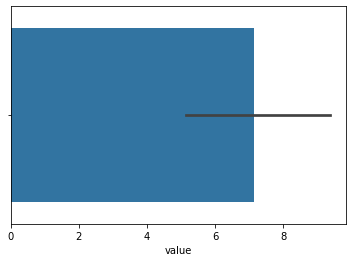

In [60]:
sns.barplot(dfVis.groupby(["age","variable"])["value"].mean())

In [89]:
dfVis2 = dfVis.groupby(lambda x: "grp1" if "female" in dfVis.loc[x,"variable"] else "grp2").head()
dfVis2

,age,variable,value
0,13-17,Female (Ph),6.0
1,18-24,Female (Ph),17.0
2,25-34,Female (Ph),15.0
3,35-44,Female (Ph),7.0
4,45-54,Female (Ph),4.0


In [70]:
dfVis2 = dfVis.groupby(["variable","age"])["value"].mean().to_frame().reset_index()
dfVis3 = dfVis2.groupby(["age","variable"])["value"].mean().to_frame().reset_index()
dfVis3

,age,variable,value
0,13-17,Female (Ph),6.0
1,13-17,Female (World),3.0
2,13-17,Male (Ph),5.0
3,13-17,Male (World),4.0
4,18-24,Female (Ph),17.0
5,18-24,Female (World),11.0
6,18-24,Male (Ph),16.0
7,18-24,Male (World),16.0
8,25-34,Female (Ph),15.0
9,25-34,Female (World),13.0


In [ ]:
df.

<AxesSubplot:xlabel='age', ylabel='value'>

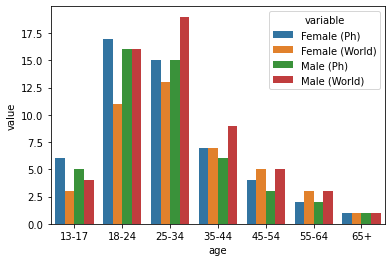

In [76]:
sns.barplot(data=dfVis2,x="age",y="value",hue="variable")